<a href="https://colab.research.google.com/github/davidrkearney/colab-notebooks/blob/main/Tensorflow_and_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow and Keras


## Credit: Code from https://github.com/jeffheaton/t81_558_deep_learning


* [TensorFlow Homepage](https://www.tensorflow.org/)
* [TensorFlow GitHib](https://github.com/tensorflow/tensorflow)
* [TensorFlow Google Groups Support](https://groups.google.com/forum/#!forum/tensorflow)
* [TensorFlow Google Groups Developer Discussion](https://groups.google.com/a/tensorflow.org/forum/#!forum/discuss)
* [TensorFlow FAQ](https://www.tensorflow.org/resources/faq)


## Deep Learning Tools

* **[TensorFlow](https://www.tensorflow.org/)** - Google's deep learning API.  The focus of this class, along with Keras.
* **[Keras](https://keras.io/)** - Also by Google, higher level framework that allows the use of TensorFlow, MXNet and Theano interchangeably.
* **[PyTorch](https://pytorch.org/)** - PyTorch is an open source machine learning library based on the Torch library, used for applications such as computer vision and natural language processing. It is primarily developed by Facebook's AI Research lab. 

* **[MXNet](https://mxnet.incubator.apache.org/)** Apache foundation's deep learning API. Can be used through Keras.
* **[Torch](http://torch.ch/)** is used by Google DeepMind, the Facebook AI Research Group, IBM, Yandex and the Idiap Research Institute.  It has been used for some of the most advanced deep learning projects in the world.  However, it requires the [LUA](https://en.wikipedia.org/wiki/Lua_(programming_language))** programming language.  It is very advanced, but it is not mainstream.  I have not worked with Torch (yet!).
* **[PaddlePaddle](https://github.com/baidu/Paddle)** - [Baidu](http://www.baidu.com/)'s deep learning API.
* **[Deeplearning4J](http://deeplearning4j.org/)** - Java based. Supports all major platforms. GPU support in Java!
* **[Computational Network Toolkit (CNTK)](https://github.com/Microsoft/CNTK)** - Microsoft.  Support for Windows/Linux, command line only.  Bindings for predictions for C#/Python. GPU support.
* **[H2O](http://www.h2o.ai/)** - Java based.  Supports all major platforms.  Limited support for computer vision. No GPU support.

+ Communicate with TensorFlow using Keras [[Cite:franccois2017deep]](https://www.manning.com/books/deep-learning-with-python).



In [23]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: using Google CoLab


In [2]:
import tensorflow as tf

# Create a Constant op that produces a 1x2 matrix.  The op is
# added as a node to the default graph.
#
# The value returned by the constructor represents the output
# of the Constant op.
matrix1 = tf.constant([[3., 3.]])

# Create another Constant that produces a 2x1 matrix.
matrix2 = tf.constant([[2.],[2.]])

# Create a Matmul op that takes 'matrix1' and 'matrix2' as inputs.
# The returned value, 'product', represents the result of the matrix
# multiplication.
product = tf.matmul(matrix1, matrix2)

print(product)
print(float(product))

tf.Tensor([[12.]], shape=(1, 1), dtype=float32)
12.0


In [3]:
import tensorflow as tf

x = tf.Variable([1.0, 2.0])
a = tf.constant([3.0, 3.0])

# Add an op to subtract 'a' from 'x'.  Run it and print the result
sub = tf.subtract(x, a)
print(sub)
print(sub.numpy())
# ==> [-2. -1.]

tf.Tensor([-2. -1.], shape=(2,), dtype=float32)
[-2. -1.]


In [4]:
x.assign([4.0, 6.0])

<tf.Variable 'UnreadVariable' shape=(2,) dtype=float32, numpy=array([4., 6.], dtype=float32)>

In [6]:
sub = tf.subtract(x, a)
print(sub)
print(sub.numpy())

tf.Tensor([1. 3.], shape=(2,), dtype=float32)
[1. 3.]


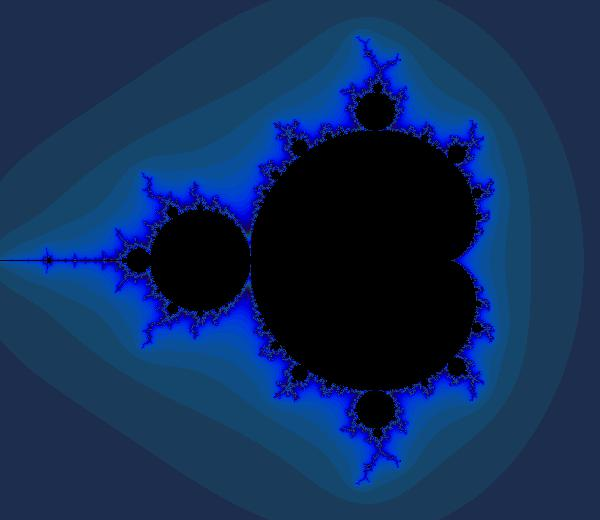

In [7]:
# Import libraries for simulation
import tensorflow as tf
import numpy as np

# Imports for visualization
import PIL.Image
from io import BytesIO
from IPython.display import Image, display

def DisplayFractal(a, fmt='jpeg'):
  """Display an array of iteration counts as a
     colorful picture of a fractal."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                        155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  PIL.Image.fromarray(a).save(f, fmt)
  display(Image(data=f.getvalue()))

# Use NumPy to create a 2D array of complex numbers

Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]
Z = X+1j*Y

xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float32))



# Operation to update the zs and the iteration count.
#
# Note: We keep computing zs after they diverge! This
#       is very wasteful! There are better, if a little
#       less simple, ways to do this.
#
for i in range(200):
    # Compute the new values of z: z^2 + x
    zs_ = zs*zs + xs

    # Have we diverged with this new value?
    not_diverged = tf.abs(zs_) < 4

    zs.assign(zs_),
    ns.assign_add(tf.cast(not_diverged, tf.float32))
    
DisplayFractal(ns.numpy())

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/auto-mpg.csv", 
    na_values=['NA', '?'])

cars = df['name']

# Handle missing value
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

# Pandas to Numpy
x = df[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']].values
y = df['mpg'].values # regression

# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x,y,verbose=2,epochs=100)

Epoch 1/100
13/13 - 0s - loss: 4580.9326
Epoch 2/100
13/13 - 0s - loss: 1225.3738
Epoch 3/100
13/13 - 0s - loss: 553.5983
Epoch 4/100
13/13 - 0s - loss: 376.0931
Epoch 5/100
13/13 - 0s - loss: 371.2755
Epoch 6/100
13/13 - 0s - loss: 355.6521
Epoch 7/100
13/13 - 0s - loss: 340.7242
Epoch 8/100
13/13 - 0s - loss: 332.5170
Epoch 9/100
13/13 - 0s - loss: 321.3474
Epoch 10/100
13/13 - 0s - loss: 309.0533
Epoch 11/100
13/13 - 0s - loss: 298.6037
Epoch 12/100
13/13 - 0s - loss: 290.2845
Epoch 13/100
13/13 - 0s - loss: 281.7734
Epoch 14/100
13/13 - 0s - loss: 267.6147
Epoch 15/100
13/13 - 0s - loss: 255.6712
Epoch 16/100
13/13 - 0s - loss: 245.0956
Epoch 17/100
13/13 - 0s - loss: 238.7114
Epoch 18/100
13/13 - 0s - loss: 228.2198
Epoch 19/100
13/13 - 0s - loss: 215.6643
Epoch 20/100
13/13 - 0s - loss: 206.8975
Epoch 21/100
13/13 - 0s - loss: 198.3939
Epoch 22/100
13/13 - 0s - loss: 189.5826
Epoch 23/100
13/13 - 0s - loss: 184.5812
Epoch 24/100
13/13 - 0s - loss: 173.4126
Epoch 25/100
13/13 - 0s

In [9]:
pred = model.predict(x)
print(f"Shape: {pred.shape}")
print(pred[0:10])

Shape: (398, 1)
[[14.227755]
 [13.352877]
 [13.366304]
 [14.042093]
 [13.76317 ]
 [12.621584]
 [11.604197]
 [11.754587]
 [12.065157]
 [11.800211]]


In [10]:
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y))
print(f"Final score (RMSE): {score}")

Final score (RMSE): 4.71485252486946


In [11]:
# Sample predictions
for i in range(10):
    print(f"{i+1}. Car name: {cars[i]}, MPG: {y[i]}, " 
          + "predicted MPG: {pred[i]}")

1. Car name: chevrolet chevelle malibu, MPG: 18.0, predicted MPG: {pred[i]}
2. Car name: buick skylark 320, MPG: 15.0, predicted MPG: {pred[i]}
3. Car name: plymouth satellite, MPG: 18.0, predicted MPG: {pred[i]}
4. Car name: amc rebel sst, MPG: 16.0, predicted MPG: {pred[i]}
5. Car name: ford torino, MPG: 17.0, predicted MPG: {pred[i]}
6. Car name: ford galaxie 500, MPG: 15.0, predicted MPG: {pred[i]}
7. Car name: chevrolet impala, MPG: 14.0, predicted MPG: {pred[i]}
8. Car name: plymouth fury iii, MPG: 14.0, predicted MPG: {pred[i]}
9. Car name: pontiac catalina, MPG: 14.0, predicted MPG: {pred[i]}
10. Car name: amc ambassador dpl, MPG: 15.0, predicted MPG: {pred[i]}


In [12]:
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/iris.csv", 
    na_values=['NA', '?'])

# Convert to numpy - Classification
x = df[['sepal_l', 'sepal_w', 'petal_l', 'petal_w']].values
dummies = pd.get_dummies(df['species']) # Classification
species = dummies.columns
y = dummies.values


# Build neural network
model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(25, activation='relu')) # Hidden 2
model.add(Dense(y.shape[1],activation='softmax')) # Output

model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(x,y,verbose=2,epochs=100)

Epoch 1/100
5/5 - 0s - loss: 1.2044
Epoch 2/100
5/5 - 0s - loss: 1.0163
Epoch 3/100
5/5 - 0s - loss: 0.9398
Epoch 4/100
5/5 - 0s - loss: 0.9153
Epoch 5/100
5/5 - 0s - loss: 0.8853
Epoch 6/100
5/5 - 0s - loss: 0.8544
Epoch 7/100
5/5 - 0s - loss: 0.8274
Epoch 8/100
5/5 - 0s - loss: 0.8119
Epoch 9/100
5/5 - 0s - loss: 0.7936
Epoch 10/100
5/5 - 0s - loss: 0.7705
Epoch 11/100
5/5 - 0s - loss: 0.7500
Epoch 12/100
5/5 - 0s - loss: 0.7247
Epoch 13/100
5/5 - 0s - loss: 0.7005
Epoch 14/100
5/5 - 0s - loss: 0.6765
Epoch 15/100
5/5 - 0s - loss: 0.6503
Epoch 16/100
5/5 - 0s - loss: 0.6312
Epoch 17/100
5/5 - 0s - loss: 0.6034
Epoch 18/100
5/5 - 0s - loss: 0.5799
Epoch 19/100
5/5 - 0s - loss: 0.5612
Epoch 20/100
5/5 - 0s - loss: 0.5416
Epoch 21/100
5/5 - 0s - loss: 0.5222
Epoch 22/100
5/5 - 0s - loss: 0.5048
Epoch 23/100
5/5 - 0s - loss: 0.4886
Epoch 24/100
5/5 - 0s - loss: 0.4717
Epoch 25/100
5/5 - 0s - loss: 0.4600
Epoch 26/100
5/5 - 0s - loss: 0.4461
Epoch 27/100
5/5 - 0s - loss: 0.4323
Epoch 28/1

In [13]:
# Print out number of species found:

print(species)

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')


In [14]:
pred = model.predict(x)
print(f"Shape: {pred.shape}")
print(pred[0:10])

Shape: (150, 3)
[[9.97697055e-01 2.15794984e-03 1.44956546e-04]
 [9.94137406e-01 5.50468592e-03 3.57910059e-04]
 [9.96191502e-01 3.52777750e-03 2.80687527e-04]
 [9.93117690e-01 6.42941520e-03 4.52894397e-04]
 [9.97973382e-01 1.89066969e-03 1.36019531e-04]
 [9.97510195e-01 2.37838831e-03 1.11383706e-04]
 [9.95967269e-01 3.74595844e-03 2.86734197e-04]
 [9.96544778e-01 3.24807805e-03 2.07129444e-04]
 [9.91251111e-01 8.11220054e-03 6.36695651e-04]
 [9.94891763e-01 4.79313312e-03 3.15106096e-04]]


In [16]:
np.set_printoptions(suppress=True)

In [17]:
print(y[0:10])

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [18]:
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y,axis=1)
print(f"Predictions: {predict_classes}")
print(f"Expected: {expected_classes}")

Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Expected: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [19]:
print(species[predict_classes[1:10]])

Index(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'],
      dtype='object')


In [20]:
from sklearn.metrics import accuracy_score

correct = accuracy_score(expected_classes,predict_classes)
print(f"Accuracy: {correct}")

Accuracy: 0.98


In [21]:
sample_flower = np.array( [[5.0,3.0,4.0,2.0]], dtype=float)
pred = model.predict(sample_flower)
print(pred)
pred = np.argmax(pred)
print(f"Predict that {sample_flower} is: {species[pred]}")

[[0.00188068 0.5159181  0.48220128]]
Predict that [[5. 3. 4. 2.]] is: Iris-versicolor


In [22]:
sample_flower = np.array( [[5.0,3.0,4.0,2.0],[5.2,3.5,1.5,0.8]],\
        dtype=float)
pred = model.predict(sample_flower)
print(pred)
pred = np.argmax(pred,axis=1)
print(f"Predict that these two flowers {sample_flower} ")
print(f"are: {species[pred]}")

[[0.00188067 0.51591814 0.4822012 ]
 [0.9928797  0.00682994 0.0002904 ]]
Predict that these two flowers [[5.  3.  4.  2. ]
 [5.2 3.5 1.5 0.8]] 
are: Index(['Iris-versicolor', 'Iris-setosa'], dtype='object')
